# Customer Churn Analysis
### Team-5
#### Aishwarya Paruchuri
#### Archita Chakraborty
#### Manjushree Barike Rajanna
#### Rohit Chandra

In [1]:
# Python statements that import the standard libraries 

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Initial settings

pd.set_option("display.max_rows", None)

In [2]:
#  Reading file using pandas read_table function 

df = pd.read_csv('../data/Customer_churn_raw.csv')
    

display(df.head(5))

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38.0,0,4370,71.0,5.0,17.0,1,1,5,197.640,177.8760,69.7640,0
1,O,0,39.0,0,NaN,5.0,7.0,4.0,1,1,6,46.035,41.4315,60.0000,0
2,10,0,37.0,0,2453,60.0,359.0,24.0,1,1,2,1536.520,1382.8680,203.6520,0
3,10,0,38.0,0,4198,66.0,1.0,35.0,1,1,10,240.020,216.0180,74.0020,0
4,3,0,NaN,0,2393,58.0,2.0,33.0,1,1,9,145.805,131.2245,64.5805,0


In [3]:
#column renaming

df=df.rename(columns={"Call  Failure": "call_failure", "Complains": "complains", "Subscription  Length": "subs_len", "Charge  Amount": "charge_amount",
                   "Seconds of Use": "seconds_of_use", "Frequency of use": "freq_of_use", "Frequency of SMS": "freq_of_sms", "Distinct Called Numbers": "distinct_call_nums",
                   "Age Group": "age_group", "Tariff Plan": "tariff_plan", "Status": "status", "Age": "age", "Customer Value": "customer_value"})

In [4]:
#Filter the dataframe for cleaning and analysis

col_4_5_12 = df.filter(['charge_amount','customer_value','seconds_of_use','Churn'], axis=1)

### Data Analysis

In [5]:
#Summary of the dataframe

col_4_5_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   charge_amount   3148 non-null   object 
 1   customer_value  3058 non-null   float64
 2   seconds_of_use  3111 non-null   object 
 3   Churn           3150 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 98.6+ KB


In [6]:
#count the total number of null values in all the columns

col_4_5_12.isnull().sum()

charge_amount      2
customer_value    92
seconds_of_use    39
Churn              0
dtype: int64

In [7]:
# Count the unique values in 'customer_value' column

col_4_5_12['customer_value'].value_counts()

0.000       40
45.495      11
40.440      10
15.165       6
25.275       5
1538.145     4
180.000      4
121.400      4
131.400      4
26.295       3
159.420      3
77.625       3
171.480      3
109.440      3
317.975      3
790.160      3
1007.440     3
2097.320     3
282.280      3
63.650       3
217.415      3
869.490      3
914.985      3
343.250      3
1492.650     3
45.585       3
1195.520     3
40.005       3
268.520      3
154.920      3
322.720      3
545.240      3
720.090      3
228.480      3
145.805      3
157.005      3
1334.520     3
1047.880     3
1881.840     3
67.600       3
734.085      3
144.520      3
837.180      3
308.960      3
191.920      3
45.840       3
5.400        3
117.090      3
2016.440     3
1380.015     3
221.280      3
163.440      3
48.100       3
883.800      3
260.800      3
168.075      3
197.640      3
791.685      3
428.715      3
32.130       3
26.010       3
1077.640     3
139.395      3
200.440      3
967.000      3
779.580      3
81.360    

In [8]:
# Replace the null values with zero

col_4_5_12['customer_value'].replace(np.nan, 0, inplace=True )


In [9]:
# Count the unique values in 'charge_amount' column

col_4_5_12['charge_amount'].value_counts()

0          1755
1           616
2           393
3           198
4            76
5            30
8            19
7            14
9            13
6            11
10            7
OOO           1
2.00001       1
o4            1
-9            1
o0            1
o3            1
o6            1
o             1
OO            1
o7            1
o1            1
o8            1
-1            1
o2            1
-3            1
o5            1
Name: charge_amount, dtype: int64

In [10]:
# Replace the null values with zero

col_4_5_12['charge_amount'].replace(np.nan, 0, inplace=True )


In [11]:
#Replace incorrect values with correct values

col_4_5_12['charge_amount'].replace(['OOO','OO','0','o','o0'], 0, inplace=True )
col_4_5_12['charge_amount'].replace(['o1'], 1, inplace=True )
col_4_5_12['charge_amount'].replace(['o7'], 7, inplace=True )
col_4_5_12['charge_amount'].replace(['o2'], 2, inplace=True )
col_4_5_12['charge_amount'].replace(['o4'], 4, inplace=True )
col_4_5_12['charge_amount'].replace(['o8'], 8, inplace=True )
col_4_5_12['charge_amount'].replace(['o5'], 5, inplace=True )
col_4_5_12['charge_amount'].replace(['o3'], 3, inplace=True )
col_4_5_12['charge_amount'].replace(['o6'], 6, inplace=True )
col_4_5_12['charge_amount'].replace(['2.00001'], 2, inplace=True )


In [12]:
# Convert datatype to intgere and make negatives positive

col_4_5_12['charge_amount'] = col_4_5_12['charge_amount'].astype(int)
col_4_5_12['charge_amount'] = col_4_5_12['charge_amount'].abs()

In [13]:
# Count the unique values in 'charge_amount' column

col_4_5_12['charge_amount'].value_counts()

0     1761
1      618
2      395
3      200
4       77
5       31
8       20
7       15
9       14
6       12
10       7
Name: charge_amount, dtype: int64

In [14]:
# Count the unique values in 'seconds_of_use' column


col_4_5_12['seconds_of_use'].value_counts()

0         131
305        37
1015        9
1973        9
2088        9
710         9
825         8
1180        8
520         8
2475        8
2393        8
955         8
1360        8
650         8
1668        7
2573        7
3145        7
1130        7
1363        7
6223        7
2268        7
438         7
1873        7
1005        7
1260        7
2665        7
1263        7
2780        7
9420        6
1933        6
2698        6
1665        6
6785        6
1970        6
3530        6
628         6
3085        6
920         6
6965        6
3470        6
700         6
7203        6
1620        6
6660        6
6413        6
875         6
2920        6
570         6
2453        6
7270        6
4210        6
3225        6
5513        6
10130       6
2535        6
6480        6
405         6
7090        6
1963        6
2148        6
1390        6
1568        6
2758        6
2360        6
2840        6
4390        6
4695        6
7023        6
3775        5
14078       5
16380       5
6500  

In [15]:
#Replace the null values with zeros

col_4_5_12['seconds_of_use'].replace(np.nan, 0, inplace=True )

In [16]:
# Convert datatype to intgere and make negatives positive

col_4_5_12['seconds_of_use'].replace(['O3915'], 3915, inplace=True )
col_4_5_12['seconds_of_use'] = col_4_5_12['seconds_of_use'].astype(int)
col_4_5_12['seconds_of_use'] = col_4_5_12['seconds_of_use'].abs()

In [17]:
# Count the unique values in 'seconds_of_use' column

col_4_5_12['seconds_of_use'].value_counts()

0        170
305       37
710        9
1015       9
1973       9
2088       9
2475       8
520        8
1180       8
650        8
1360       8
955        8
825        8
2393       8
3145       7
1263       7
1668       7
2665       7
6223       7
2780       7
1260       7
2573       7
1363       7
1005       7
438        7
1873       7
2268       7
1130       7
3085       6
6480       6
4210       6
2920       6
875        6
1933       6
1970       6
1620       6
405        6
1568       6
7090       6
3470       6
7270       6
5513       6
3225       6
9420       6
6965       6
3530       6
7203       6
1390       6
7023       6
920        6
700        6
2360       6
4390       6
10130      6
6660       6
1665       6
628        6
2758       6
2840       6
1963       6
4695       6
2535       6
2148       6
6785       6
6413       6
4515       6
2453       6
2698       6
570        6
1315       5
3095       5
1010       5
14835      5
3718       5
16380      5
1225       5
1695       5

In [18]:
# Count the total number fo null values 

col_4_5_12.isnull().sum()

charge_amount     0
customer_value    0
seconds_of_use    0
Churn             0
dtype: int64

In [19]:
# Get the summary of dataframe

col_4_5_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   charge_amount   3150 non-null   int64  
 1   customer_value  3150 non-null   float64
 2   seconds_of_use  3150 non-null   int64  
 3   Churn           3150 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 98.6 KB


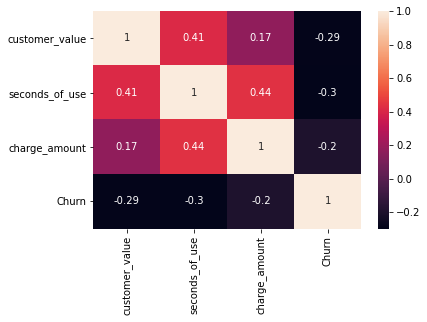

In [20]:
##

col_4_5_12= pd.DataFrame(col_4_5_12, columns=['customer_value','seconds_of_use','charge_amount','Churn'])
corrMatrix = col_4_5_12.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()
    
